In [7]:
from keras.datasets import imdb
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [23]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [8]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [34]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=8,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/8
15000/15000 [==============================] - 2s 138us/step - loss: 0.4675 - acc: 0.7889 - val_loss: 0.3342 - val_acc: 0.8841
Epoch 2/8
15000/15000 [==============================] - 2s 129us/step - loss: 0.2678 - acc: 0.9093 - val_loss: 0.3103 - val_acc: 0.8768
Epoch 3/8
15000/15000 [==============================] - 1235s 82ms/step - loss: 0.2019 - acc: 0.9349 - val_loss: 0.2736 - val_acc: 0.8896
Epoch 4/8
15000/15000 [==============================] - 35s 2ms/step - loss: 0.1611 - acc: 0.9467 - val_loss: 0.2941 - val_acc: 0.8810
Epoch 5/8
15000/15000 [==============================] - 2s 145us/step - loss: 0.1324 - acc: 0.9577 - val_loss: 0.2967 - val_acc: 0.8813
Epoch 6/8
15000/15000 [==============================] - 27364s 2s/step - loss: 0.1090 - acc: 0.9683 - val_loss: 0.3066 - val_acc: 0.8841
Epoch 7/8
15000/15000 [==============================] - 2s 144us/step - loss: 0.0965 - acc: 0.9700 - val_loss: 0.3133 - val_a

In [19]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 378us/step - loss: 0.5186 - acc: 0.8019 - val_loss: 0.3959 - val_acc: 0.8694
Epoch 2/20
15000/15000 [==============================] - 5s 305us/step - loss: 0.3194 - acc: 0.9018 - val_loss: 0.3165 - val_acc: 0.8799
Epoch 3/20
15000/15000 [==============================] - 4s 299us/step - loss: 0.2343 - acc: 0.9245 - val_loss: 0.2802 - val_acc: 0.8896
Epoch 4/20
15000/15000 [==============================] - 4s 296us/step - loss: 0.1840 - acc: 0.9399 - val_loss: 0.2726 - val_acc: 0.8897
Epoch 5/20
15000/15000 [==============================] - 5s 300us/step - loss: 0.1510 - acc: 0.9531 - val_loss: 0.2773 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 4s 291us/step - loss: 0.1235 - acc: 0.9624 - val_loss: 0.2939 - val_acc: 0.8845
Epoch 7/20
15000/15000 [==============================] - 4s 293us/step - loss: 0.1038 - acc: 0.9678 - val_loss: 0.3056 - 

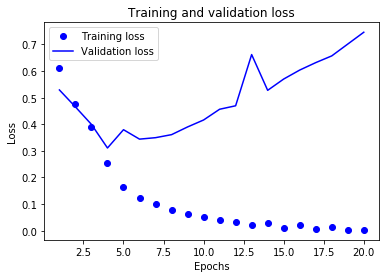

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

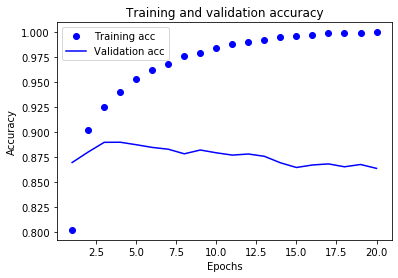

In [21]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 6s 243us/step - loss: 0.4255 - accuracy: 0.8135
Epoch 2/4
25000/25000 [==============================] - 6s 231us/step - loss: 0.2332 - accuracy: 0.9138
Epoch 3/4
25000/25000 [==============================] - 6s 230us/step - loss: 0.1825 - accuracy: 0.9320
Epoch 4/4
25000/25000 [==============================] - 7s 264us/step


[0.4232831921386719, 0.8506399989128113]

In [25]:
model.predict(x_test)

array([[0.1548531 ],
       [0.9997362 ],
       [0.5775565 ],
       ...,
       [0.05679545],
       [0.04232627],
       [0.5328085 ]], dtype=float32)